# 📈 Project 2: Sales Performance Analysis
**Objective**: Analyze sales data to identify trends, relationships, and factors affecting sales performance.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style='whitegrid')

## Step 1: Load and Explore the Dataset

In [16]:
df = pd.read_csv('sales_data.csv')
print("Shape:", df.shape)
df.info()
df.head()

Shape: (505, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   505 non-null    object 
 1   Region    505 non-null    object 
 2   Category  505 non-null    object 
 3   Sales     495 non-null    float64
 4   Profit    495 non-null    float64
 5   Discount  495 non-null    float64
 6   Date      505 non-null    object 
dtypes: float64(3), object(4)
memory usage: 27.7+ KB


,Product,Region,Category,Sales,Profit,Discount,Date
0,Widget A,East,Electronics,4.12,-23.72,0.26,2023-04-13
1,Gadget D,South,Electronics,20.13,-85.38,0.01,2023-12-15
2,Widget A,South,Furniture,193.32,88.83,0.23,2023-09-28
3,Gadget D,North,Furniture,184.53,125.94,0.38,2023-04-17
4,Widget A,West,Furniture,82.41,-73.72,0.23,2023-03-13


## Step 2: Data Cleaning

In [17]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values with mean or median
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

## Step 3: Exploratory Data Analysis

### Sales Trends Over Time

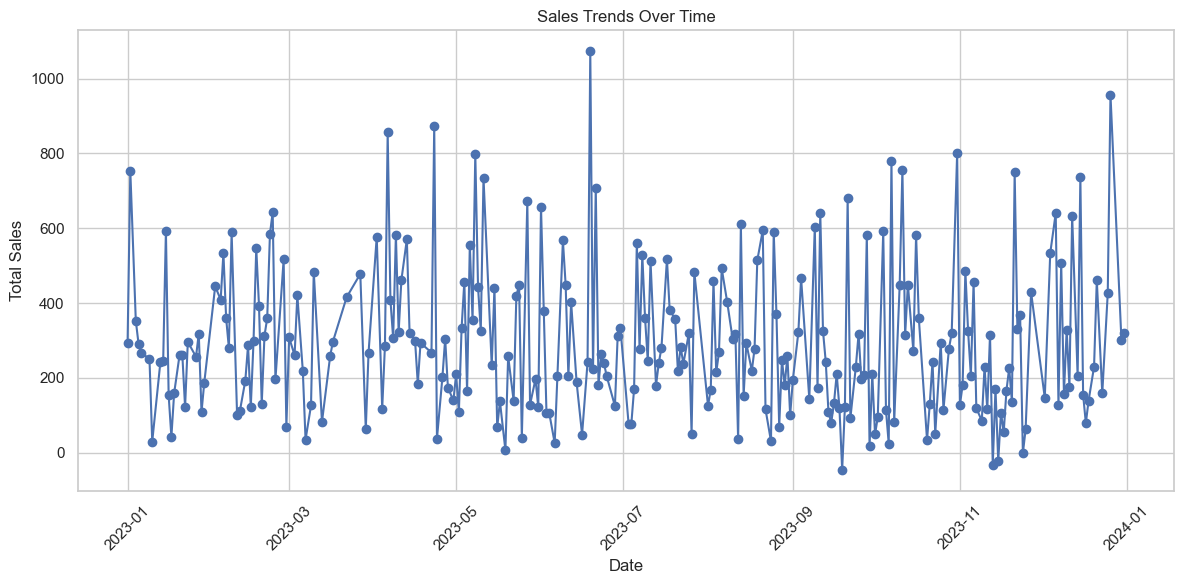

In [18]:
sales_trend = df.groupby('Date')['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(sales_trend['Date'], sales_trend['Sales'], marker='o')
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relationship: Profit vs. Discount

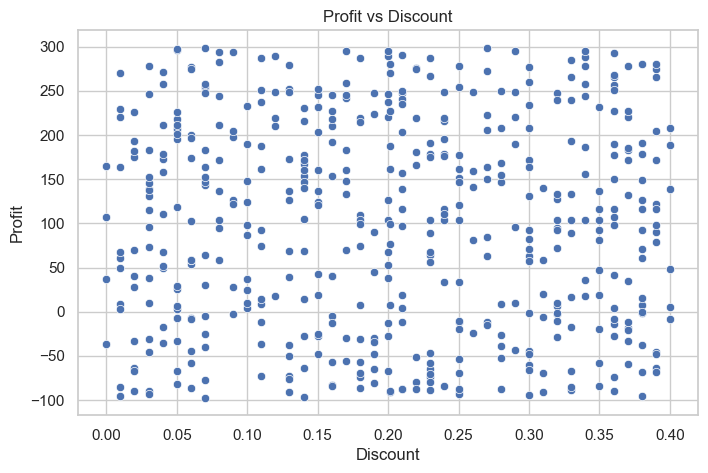

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

### Sales by Region and Category

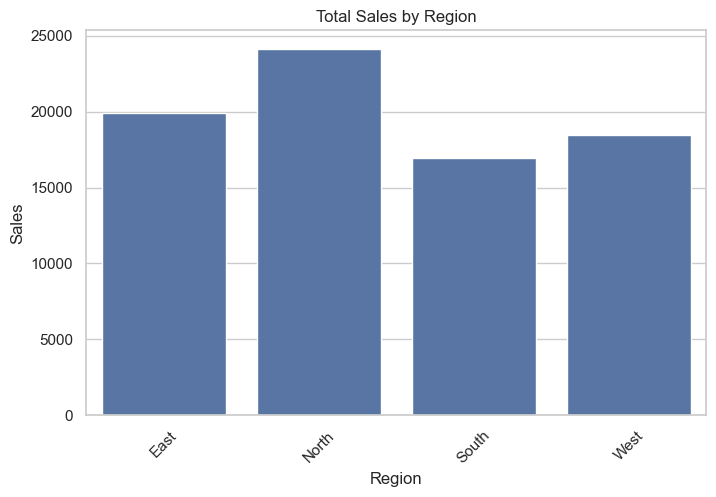

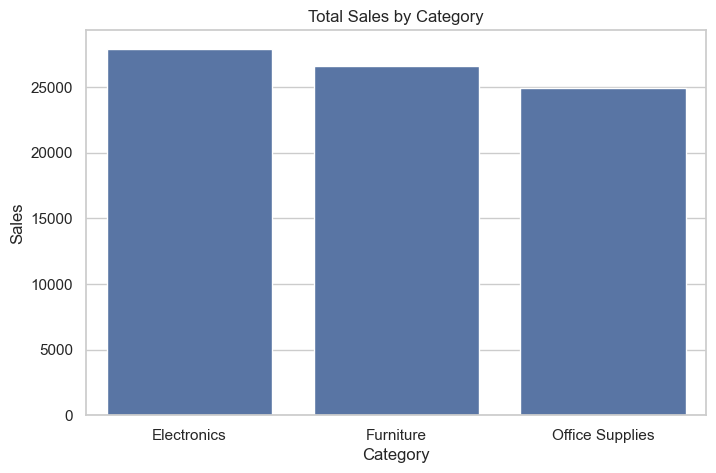

In [20]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title("Total Sales by Region")
plt.xticks(rotation=45)
plt.show()

# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title("Total Sales by Category")
plt.show()

## Step 4: Predictive Modeling - Linear Regression

In [21]:
# Feature selection and model training
X = df[['Profit', 'Discount']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

### Model Evaluation

In [22]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.69
Mean Squared Error: 2748.41


## Step 5: Export Cleaned Dataset

In [23]:
df.to_csv('Cleaned_Sales_Data.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_Sales_Data.csv'")

Cleaned dataset saved as 'Cleaned_Sales_Data.csv'
